<a href="https://colab.research.google.com/github/Rahafsjob/Capstone_Project_WeCloudData/blob/main/Stage2/DataCleaning_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libraries

In [ ]:
!pip install SQLAlchemy
!pip install PyMySQL

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

#  ☑️ Workflow: Clean AWS RDS Table


*   Step 1: Connect to AWS RDS from Colab (Make Connection)
*   Step 2: Clean it up using Query
*   Step 3: Replace the cleaned file to the old one


\# Step 1: Connect to AWS RDS from Colab (Make Connection)

In [ ]:
from sqlalchemy import create_engine

ENDPOINT = "demo-rds-mysql-db.csb002k2ask1.us-east-1.rds.amazonaws.com"
PORT = "3306"
USERNAME = "admin"
PASSWORD = "Shmuokh001*"
DATABASENAME = "demo_db"

engine = create_engine(f"mysql+pymysql://{USERNAME}:{PASSWORD}@{ENDPOINT}:{PORT}/{DATABASENAME}")

# Test Connection

In [ ]:
from sqlalchemy import text

with engine.connect() as connection:
  result = connection.execute(text("SHOW TABLES"))
  tables = result.fetchall()
  print(tables)

[('Centers',), ('Change_New_Joiners',), ('Change_Requests',), ('Cohort_Assignment',), ('Cohort_Schedule',), ('Quizzes',), ('Quizzes_Cleaned',), ('Student_Status',), ('assiements',), ('attempts',), ('attendance',), ('chapters',), ('choices',), ('cohort_course_enrollments',), ('cohort_courses',), ('cohort_enrollments',), ('cohorts',), ('handin_attachments',), ('materials',), ('program_courses',), ('programs',), ('questions',), ('topics',), ('user_exams',), ('user_materials',), ('users',)]


# 1. Assiements Table 🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM assiements;"  # Adjust table name if needed
df1 = pd.read_sql(query, engine)

# Preview the data
df1.head()

,Student_ID,week1,week2,week3,week4,week5,week6,week7,final_score,name
0,Stud0449,100%,100%,100%,100%,100%,100%,100%,100.0,Data Governance (Online Batch)
1,Stud0450,100%,100%,100%,100%,100%,100%,100%,100.0,Data Governance (Online Batch)
2,Stud0451,100%,100%,100%,100%,100%,100%,100%,100.0,Data Governance (Online Batch)
3,Stud0452,100%,100%,100%,100%,100%,100%,100%,100.0,Data Governance (Online Batch)
4,Stud0453,100%,100%,100%,100%,100%,100%,100%,100.0,Data Governance (Online Batch)


The Result of Assiements cleaning

The Assiements table is very clean and straightforward

# 3. Attendance Table  🟩


In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM attendance;"  # Adjust table name if needed
df3 = pd.read_sql(query, engine)

# Preview the data
df3.head()

,StudentID,attendance_date,attendance_data,course_name,cohort_number,filename,Final_Cohort,level
0,Stud0013,2024-08-05,p,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3
1,Stud0103,2024-08-05,p,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3
2,Stud0173,2024-08-05,x,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3
3,Stud0198,2024-08-05,p,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3
4,Stud0220,2024-08-05,p,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3


In [ ]:
#Quick EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic info
print("Shape:", df3.shape)
print("\nData types:\n", df3.dtypes)
#print("\nFirst 5 rows:\n", df.head())

# 2. Missing Values & Duplicates
print("\nMissing values per column:\n", df3.isnull().sum())
print("\nTotal duplicate rows:", df3.duplicated().sum())

# 3. Descriptive statistics
#print("\nDescriptive statistics (numerical):\n", df3.describe())
#print("\nDescriptive statistics (categorical):\n", df3.describe(include=['O']))

# 4. Value counts for categorical features
cat_cols = df3.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df3[col].value_counts())

# 5. Correlation analysis (numerical)
corr = df3.corr(numeric_only=True)
print("\nCorrelation matrix:\n", corr)

Shape: (9439, 8)

Data types:
 StudentID          object
attendance_date    object
attendance_data    object
course_name        object
cohort_number      object
filename           object
Final_Cohort       object
level              object
dtype: object

Missing values per column:
 StudentID           0
attendance_date     0
attendance_data    90
course_name         0
cohort_number       0
filename            0
Final_Cohort        0
level               0
dtype: int64

Total duplicate rows: 5

Value counts for StudentID:
 StudentID
Stud0261    80
Stud0103    80
Stud0250    78
Stud0077    73
Stud0041    73
            ..
Stud0122     4
Stud0180     4
Stud0203     4
Stud0223     4
Stud0269     4
Name: count, Length: 421, dtype: int64

Value counts for attendance_date:
 attendance_date
2024-07-03    117
2024-09-20     86
2024-06-03     85
2024-09-30     75
2024-10-01     75
             ... 
2024-04-24     16
2024-08-15     13
2024-08-16     13
2024-06-14     11
2024-06-06     10
Name: coun

In [ ]:
# Remove duplicates
df3_cleaned = df3.drop_duplicates()

In [ ]:
print("Number of rows:", len(df3_cleaned))

Number of rows: 9434


attendance_status
Present    6262
Absent     3067
Excused      16
Leave         4
Name: count, dtype: int64


<ipython-input-23-f8c3d5147d3a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x='attendance_status', order=df3['attendance_status'].value_counts().index, palette="Set2")


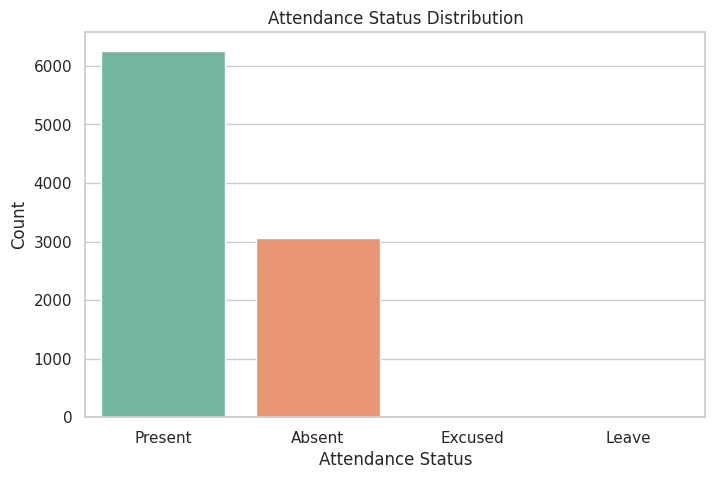

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Normalize (make lowercase)
df3['attendance_data'] = df3['attendance_data'].str.lower()

# 2. Map codes to descriptive values
code_map = {
    'p': 'Present',
    'P': 'Present',
    'x': 'Absent',
    'X': 'Absent',
    'e': 'Excused',
    'l': 'Leave'
}
df3_cleaned = df3['attendance_status'] = df3['attendance_data'].map(code_map)

# 3. Show the value counts
print(df3['attendance_status'].value_counts())

# 4. Visualize the distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df3, x='attendance_status', order=df3['attendance_status'].value_counts().index, palette="Set2")
plt.title('Attendance Status Distribution')
plt.xlabel('Attendance Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# Replace table with cleaned version
df3.to_sql('attendance', engine, if_exists='replace', index=False)

9439

In [ ]:
# Run query using pandas
#import pandas as pd
query = "SELECT * FROM attendance;"  # Adjust table name if needed
df3 = pd.read_sql(query, engine)

# Preview the data
df3.head()

,StudentID,attendance_date,attendance_data,course_name,cohort_number,filename,Final_Cohort,level,attendance_status
0,Stud0013,2024-08-05,p,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3,Present
1,Stud0103,2024-08-05,p,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3,Present
2,Stud0173,2024-08-05,x,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3,Absent
3,Stud0198,2024-08-05,p,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3,Present
4,Stud0220,2024-08-05,p,NLP and LLM Finetuning,3,Attendance Register - NLP and LLM Finetuning -...,NLP and LLM Finetuning - Cohort 3,3,Present


As result of cleaning:

- Delete 5 duplicates rows
- Create new column called 'attendance_status'  by mapping [attendance_data] to be Present, Absent, Excused, and Leave.

# 4. Chapters Table  🟩



In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM chapters;"  # Adjust table name if needed
df4 = pd.read_sql(query, engine)

# Preview the data
df4.head()

,id,name,handle,exam_id,position,client_id,published,created_at,updated_at,description,resource_id,cohort_course_id,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,3212,Introduction,welcome,None,3,client_1,0.0,2024-01-26 18:17:32.043336,2024-02-06 11:54:53.694018,<p>This chapter includes the introduction of c...,None,426,001cd7cf-e03e-4c33-a359-a508b5b17282,2025-04-30 11:45:25.033,"{""changes"": []}"
1,5130,Chapter 7 - EDA for Machine Learning,"chapter-7:-cross-validation,-variance-bias-tra...",None,9,client_1,1.0,2024-08-21 18:28:44.482119,2024-08-21 18:28:44.482119,,None,610,00585d63-6551-41b4-bcdf-a72fb82e800f,2025-04-30 11:45:25.033,"{""changes"": []}"
2,3949,Chapter 3: LLMs,chapter-3:-generative-models,None,4,client_1,1.0,2024-03-28 09:19:54.600762,2024-03-28 09:19:54.600762,,None,495,005f3c56-748e-4f6a-a9d2-2d8fc38e4445,2025-04-30 11:45:25.033,"{""changes"": []}"
3,3586,Text: Synthetic Data Generation,text:-synthetic-data-generation,None,5,client_1,1.0,2024-02-22 14:47:06.954175,2024-03-04 16:31:51.401286,None,None,388,009ab638-aa78-4bad-9b47-6978bdca5c90,2025-04-30 11:45:25.033,"{""changes"": []}"
4,5639,Common Data Handling Mistakes and How to Avoid...,common-data-handling-mistakes-and-how-to-avoid...,None,8,client_2,1.0,2025-02-12 19:00:54.241727,2025-02-12 19:03:54.461855,"In this section, students will explore common ...",None,650,00b33962-5b80-4958-b91b-59bb744d45a8,2025-04-30 11:45:25.033,"{""changes"": []}"


In [ ]:
# Drop metadata columns
#df4.drop(columns=['resource_id','_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

# Preview the cleaned data
#print("Cleaned chapters data:")
#print(df4.head())

df4.head()

# Optional: Save to a new table or CSV
# df_chapters.to_sql('chapters_cleaned', engine, index=False, if_exists='replace')
# OR
# df_chapters.to_csv('chapters_cleaned.csv', index=False)


,id,name,handle,exam_id,position,client_id,published,created_at,updated_at,description,resource_id,cohort_course_id
0,3212,Introduction,welcome,None,3,client_1,0.0,2024-01-26 18:17:32.043336,2024-02-06 11:54:53.694018,<p>This chapter includes the introduction of c...,None,426
1,5130,Chapter 7 - EDA for Machine Learning,"chapter-7:-cross-validation,-variance-bias-tra...",None,9,client_1,1.0,2024-08-21 18:28:44.482119,2024-08-21 18:28:44.482119,,None,610
2,3949,Chapter 3: LLMs,chapter-3:-generative-models,None,4,client_1,1.0,2024-03-28 09:19:54.600762,2024-03-28 09:19:54.600762,,None,495
3,3586,Text: Synthetic Data Generation,text:-synthetic-data-generation,None,5,client_1,1.0,2024-02-22 14:47:06.954175,2024-03-04 16:31:51.401286,None,None,388
4,5639,Common Data Handling Mistakes and How to Avoid...,common-data-handling-mistakes-and-how-to-avoid...,None,8,client_2,1.0,2025-02-12 19:00:54.241727,2025-02-12 19:03:54.461855,"In this section, students will explore common ...",None,650


In [ ]:
# Mapping [exam_id] using "cohort courses"  table

# Step 1: Create a mapping from cohort_course_id to exam_id
course_id_to_exam = cohort_courses_df.set_index('id')['exam_id'].to_dict()

# Step 2: Fill missing exam_id in chapters
df4['exam_id'] = df4['exam_id'].fillna(
    df4['cohort_course_id'].map(course_id_to_exam)
)

# Change data type
df4 = df4.infer_objects(copy=False)

# Drop unused column
df4.drop(columns=['published','resource_id','_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

# Fill null values in description column
df4['description'] = df4['description'].replace('', pd.NA).fillna("No description provided.")

In [ ]:
# Replace the new table after cleaning to the old one in RDS
df4.to_sql('chapters', engine, index=False, if_exists='replace')

12474

# Cohort Courses Table 🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM cohort_courses;"  # Adjust table name if needed
cohort_courses_df = pd.read_sql(query, engine)

# Preview the data
cohort_courses_df.head()

,id,name,exam_id,client_id,cohort_id,published,created_at,description,quiz_weight,project_weight,assignment_weight,soft_skills_weight,attendance_total_weight,attendance_late_weight,attendance_absence_weight,attendance_excused_weight,attendance_present_weight
0,376,Prompt-Design,143,client_1,217,1,2023-09-29,No description provided.,20,40,40,0,10,80,0,90,100
1,390,- Python Fundamentals (Cohort 1),147,client_1,222,1,2023-11-13,No description provided.,20,40,40,0,10,80,0,90,100
2,407,- Prompt Engineering,143,client_1,226,0,2023-12-13,No description provided.,20,40,40,0,10,80,0,90,100
3,645,& (part 1) - NLP Introduction,263,client_1,324,0,2025-01-19,No description provided.,20,40,40,0,0,80,0,90,100
4,423,DE Bootcamp Content Dev,180,client_2,240,0,2024-01-15,No description provided.,20,40,40,0,10,80,0,90,100


In [ ]:
cohort_courses_df.columns

Index(['id', 'name', 'exam_id', 'client_id', 'cohort_id', 'published',
       'created_at', 'description', 'quiz_weight', 'project_weight',
       'assignment_weight', 'soft_skills_weight', 'attendance_total_weight',
       'attendance_late_weight', 'attendance_absence_weight',
       'attendance_excused_weight', 'attendance_present_weight'],
      dtype='object')

In [ ]:
# 1. Drop unnecessary columns
cols_to_drop = ['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta', 'resource_id']
cohort_courses_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [ ]:
# 2. Clean course names (remove leading special chars)
cohort_courses_df['name'] = cohort_courses_df['name'].str.replace(r'^[-&]\s*', '', regex=True).str.strip()

# 3. clean created_at colmn
cohort_courses_df['created_at'] = pd.to_datetime(cohort_courses_df['created_at']).dt.date

In [ ]:
import pandas as pd
import ast

def extract_weights(weight_data):
    """Extract weights from JSON/dict while handling all edge cases"""
    try:
        if pd.isna(weight_data):
            return pd.Series({k: 0 for k in weight_columns})

        if isinstance(weight_data, str):
            weights = ast.literal_eval(weight_data)
        else:
            weights = weight_data

        # Main weights
        result = {
            'quiz_weight': weights.get('quizzes', 0),
            'project_weight': weights.get('projects', 0),
            'assignment_weight': weights.get('assignments', 0),
            'soft_skills_weight': weights.get('soft_skills', 0)
        }

        # Handle both nested and flat attendance structures
        attendances = weights.get('attendances', {})
        if isinstance(attendances, dict):
            result['attendance_total_weight'] = attendances.get('total', 0)
            participation = attendances.get('participation', attendances)
            result.update({
                'attendance_late_weight': participation.get('late', 0),
                'attendance_absence_weight': participation.get('absence', 0),
                'attendance_excused_weight': participation.get('excused', 0),
                'attendance_present_weight': participation.get('present', 0)
            })

        return pd.Series(result)

    except:
        return pd.Series({k: 0 for k in weight_columns})

# Define all weight columns we'll create
weight_columns = [
    'quiz_weight', 'project_weight', 'assignment_weight',
    'soft_skills_weight', 'attendance_total_weight',
    'attendance_late_weight', 'attendance_absence_weight',
    'attendance_excused_weight', 'attendance_present_weight'
]

# Extract weights directly into new columns
cohort_courses_df[weight_columns] = cohort_courses_df['weight'].apply(extract_weights)

# Calculate total weight for validation
cohort_courses_df['total_weight'] = (
    cohort_courses_df['quiz_weight'] +
    cohort_courses_df['project_weight'] +
    cohort_courses_df['assignment_weight'] +
    cohort_courses_df['soft_skills_weight'] +
    cohort_courses_df['attendance_total_weight']
)

In [ ]:
# Group topics by cohort_course_id and check if any topic is published
published_status = topics_df.groupby('cohort_course_id')['published'].any().reset_index()

# Merge the published status into cohort_courses
cohort_courses_df = cohort_courses_df.merge(
    published_status,
    left_on='id',
    right_on='cohort_course_id',
    how='left',
    suffixes=('', '_from_topics')
)

# Update the published column
cohort_courses_df['published'] = cohort_courses_df['published_from_topics'].fillna(False)

# Drop the extra column
cohort_courses_df.drop(columns=['published_from_topics', 'cohort_course_id'], inplace=True)
cohort_courses_df['published'] = cohort_courses_df['published'].astype(int)

<ipython-input-134-4f37cfd3aa0d>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cohort_courses_df['published'] = cohort_courses_df['published_from_topics'].fillna(False)


In [ ]:
cohort_courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         1540 non-null   int64 
 1   name                       1540 non-null   object
 2   exam_id                    1540 non-null   int64 
 3   client_id                  1540 non-null   object
 4   cohort_id                  1540 non-null   int64 
 5   published                  1540 non-null   int64 
 6   created_at                 1540 non-null   object
 7   description                792 non-null    object
 8   quiz_weight                1540 non-null   int64 
 9   project_weight             1540 non-null   int64 
 10  assignment_weight          1540 non-null   int64 
 11  soft_skills_weight         1540 non-null   int64 
 12  attendance_total_weight    1540 non-null   int64 
 13  attendance_late_weight     1540 non-null   int64 
 14  attendan

In [ ]:
# delete weight	column
# cohort_courses_df.drop(columns=['weight'], inplace=True)
cohort_courses_df.drop(columns=['total_weight'], inplace=True)

In [ ]:
cohort_courses_df.head()

,id,name,exam_id,client_id,cohort_id,published,created_at,description,quiz_weight,project_weight,assignment_weight,soft_skills_weight,attendance_total_weight,attendance_late_weight,attendance_absence_weight,attendance_excused_weight,attendance_present_weight,total_weight
0,376,Prompt-Design,143,client_1,217,1,2023-09-29,None,20,40,40,0,10,80,0,90,100,110
1,390,- Python Fundamentals (Cohort 1),147,client_1,222,1,2023-11-13,None,20,40,40,0,10,80,0,90,100,110
2,407,- Prompt Engineering,143,client_1,226,0,2023-12-13,None,20,40,40,0,10,80,0,90,100,110
3,645,& (part 1) - NLP Introduction,263,client_1,324,0,2025-01-19,,20,40,40,0,0,80,0,90,100,100
4,423,DE Bootcamp Content Dev,180,client_2,240,0,2024-01-15,,20,40,40,0,10,80,0,90,100,110


In [ ]:
table_name2 = 'cohort_courses'
# Save to MySQL RDS
cohort_courses_df.to_sql(
    name=table_name2,          # Table name
    con=engine,               # SQLAlchemy engine
    if_exists='replace',      # Options: 'fail', 'replace', 'append'
    index=False,              # Don't write DataFrame index as a column
    chunksize=1000            # Optional: write in batches for large DataFrames
)

print(f"Transferred {len(cohort_courses_df)} rows to {table_name2} in MySQL RDS after cleaning")

Transferred 1540 rows to cohort_courses in MySQL RDS after cleaning


In [ ]:
# Cleaning for Description column
cohort_courses_df['description'] = cohort_courses_df['description'].replace('', pd.NA).fillna("No description provided.")

# Replace the new table after cleaning to the old one in RDS
cohort_courses_df.to_sql('cohort_courses', engine, index=False, if_exists='replace')

1540

In [ ]:
# Display it
cohort_courses_df.head()

,id,name,exam_id,client_id,cohort_id,published,created_at,description,quiz_weight,project_weight,assignment_weight,soft_skills_weight,attendance_total_weight,attendance_late_weight,attendance_absence_weight,attendance_excused_weight,attendance_present_weight
0,376,Prompt-Design,143,client_1,217,1,2023-09-29,No description provided.,20,40,40,0,10,80,0,90,100
1,390,- Python Fundamentals (Cohort 1),147,client_1,222,1,2023-11-13,No description provided.,20,40,40,0,10,80,0,90,100
2,407,- Prompt Engineering,143,client_1,226,0,2023-12-13,No description provided.,20,40,40,0,10,80,0,90,100
3,645,& (part 1) - NLP Introduction,263,client_1,324,0,2025-01-19,No description provided.,20,40,40,0,0,80,0,90,100
4,423,DE Bootcamp Content Dev,180,client_2,240,0,2024-01-15,No description provided.,20,40,40,0,10,80,0,90,100


# Topics Table 🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM topics;"  # Adjust table name if needed
topics_df = pd.read_sql(query, engine)

# Preview the data
topics_df.head()

In [ ]:
# Drop metadata columns
topics_df.drop(columns=['_airbyte_oraw_id', '_airbyte_extracted_at', '_airbyte_meta', 'resource_id'], inplace=True)

In [ ]:
# نبدأ بعمل نسخة فقط للأعمدة المهمة من cohort_courses
cohort_courses_subset = cohort_courses_df[['id', 'exam_id', 'client_id']].copy()
cohort_courses_subset.rename(columns={'id': 'cohort_course_id'}, inplace=True)

# نحاول نربط المواضيع (topics) بالدورات (cohort_courses) حسب exam_id و client_id
topics_filled = topics_df.merge(
    cohort_courses_subset,
    on='client_id',
    how='left',
    suffixes=('', '_from_courses')
)

# نملأ cohort_course_id فقط إذا كان NaN
topics_filled['cohort_course_id'] = topics_filled['cohort_course_id'].fillna(
    topics_filled['cohort_course_id_from_courses']
)

# نملأ exam_id فقط إذا كان NaN
topics_filled['exam_id'] = topics_filled['exam_id'].fillna(
    topics_filled['exam_id_from_courses']
)

# نحذف الأعمدة المكررة
topics_filled.drop(columns=['cohort_course_id_from_courses', 'exam_id_from_courses'], inplace=True)

# هذا هو الجدول النهائي
topics_df = topics_filled

In [ ]:
topics_df['created_at'] = pd.to_datetime(topics_df['created_at']).dt.date

In [ ]:
topics_df.head()

,id,name,exam_id,position,client_id,published,chapter_id,created_at,cohort_course_id
0,9693,Tuesday - Pandas 1,180.0,3,client_2,1.0,3411,2024-02-04,423.0
1,9693,Tuesday - Pandas 1,249.0,3,client_2,1.0,3411,2024-02-04,605.0
2,9693,Tuesday - Pandas 1,252.0,3,client_2,1.0,3411,2024-02-04,592.0
3,9693,Tuesday - Pandas 1,187.0,3,client_2,1.0,3411,2024-02-04,441.0
4,9693,Tuesday - Pandas 1,212.0,3,client_2,1.0,3411,2024-02-04,488.0


In [ ]:
# Replace table with cleaned version
topics_df.to_sql('topics', engine, if_exists='replace', index=False)

NameError: name 'df3' is not defined

# 5. Choices Table  🟩



In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM choices;"  # Adjust table name if needed
choices_df = pd.read_sql(query, engine)

# Preview the data
choices_df.head()

In [ ]:
# Drop unused column
choices_df.drop(columns=['grade','notes','comment','_airbyte_raw_id','_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

In [ ]:
# Preview the data
choices_df.head()

,id,choice,graded,correct,user_id,client_id,attempt_id,question_id
0,85701,0,0,1,8459,client_1,9143,16361
1,93094,0,0,1,8712,client_1,9926,17460
2,91448,4,0,0,8360,client_1,9689,17498
3,103152,2,0,0,8999,client_2,10940,18239
4,138602,0,0,1,10182,client_2,14742,25675


In [ ]:
missing_choices = choices_df[choices_df['choice'].isna()]
print(missing_choices.sample(5))  # Inspect a few randomly

            id choice  graded  correct  user_id client_id  attempt_id  \
309193  138026   None       0        0    10011  client_2       14596   
134966  135458   None       0        0     9812  client_2       14367   
433305   98426   None       0        0     8602  client_2       10567   
317896  129557   None       0        0     9670  client_2       13432   
263388   87513   None       0        0     8312  client_1        9277   

        question_id  
309193        25831  
134966        24333  
433305        18218  
317896        25831  
263388        16320  


In [ ]:
print(choices_df['choice'].isna().sum())
print(choices_df['choice'].dtype)

24024
object


In [ ]:
choices_df['choice'] = choices_df['choice'].replace('', pd.NA)
choices_df['choice'] = choices_df['choice'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
# Replace the new table after cleaning to the old one in RDS
choices_df.to_sql('choices', engine, index=False, if_exists='replace')

# 5. user_exams Table 🟩



In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM user_exams;"  # Adjust table name if needed
user_exams_df = pd.read_sql(query, engine)

# Preview the data
user_exams_df.head()

,id,exam_id,user_id,client_id,created_at,stars_count,cohort_course_id,stars_total_count,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,8254,None,8938,client_2,2024-02-04 07:58:42.476557,139.0,449,249.0,000d4309-f846-487e-b5b4-81c1f425b575,2025-04-30 11:45:23.375,"{""changes"": []}"
1,7833,None,8692,client_1,2024-01-15 09:47:06.099833,15.0,390,15.0,0049560a-5f88-4ce3-9193-b15249862a52,2025-04-30 11:45:23.375,"{""changes"": []}"
2,12392,None,9750,client_2,2024-12-24 16:36:52.863828,NaN,444,NaN,004a3590-38e3-42d8-a07b-1aeb2a49c376,2025-04-30 11:45:23.375,"{""changes"": []}"
3,13258,None,9829,client_1,2025-03-03 10:45:46.999408,0.0,658,6.0,005d7ae4-bef5-4a6e-9866-03c2ab491795,2025-04-30 11:45:23.375,"{""changes"": []}"
4,13187,None,9940,client_1,2025-02-24 11:43:46.940482,NaN,643,NaN,0068a1f0-2b96-4a0e-8141-fd1566750cc9,2025-04-30 11:45:23.375,"{""changes"": []}"


In [ ]:
# 1. Drop unnecessary columns
cols_to_drop = ['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta']
user_exams_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [ ]:
user_exams_df['created_at'] = pd.to_datetime(user_exams_df['created_at']).dt.date

In [ ]:
# دمج الجداول بناءً على العمود المشترك
merged_df = user_exams_df.merge(
    cohort_courses_df[['id', 'exam_id']],
    left_on='cohort_course_id',
    right_on='id',
    how='left',
    suffixes=('', '_from_courses')
)

# تحديث عمود exam_id في user_exams_df بالقيم من جدول cohort_courses
user_exams_df['exam_id'] = merged_df['exam_id_from_courses']

In [ ]:
user_exams_df['progress_percent'] = (
    user_exams_df['stars_count'] / user_exams_df['stars_total_count']
) * 100

user_exams_df['progress_percent'] = user_exams_df['progress_percent'].round(1)

In [ ]:
user_exams_df.head()

,id,exam_id,user_id,client_id,created_at,stars_count,cohort_course_id,stars_total_count,progress_percent
0,8254,179.0,8938,client_2,2024-02-04,139.0,449,249.0,55.8
1,7833,179.0,8692,client_1,2024-01-15,15.0,390,15.0,100.0
2,12392,179.0,9750,client_2,2024-12-24,NaN,444,NaN,NaN
3,13258,179.0,9829,client_1,2025-03-03,0.0,658,6.0,0.0
4,13187,179.0,9940,client_1,2025-02-24,NaN,643,NaN,NaN


In [ ]:
user_exams_df.isna().sum()

,0
id,0
exam_id,9
user_id,0
client_id,0
created_at,0
stars_count,3903
cohort_course_id,0
stars_total_count,3848
progress_percent,3903


In [ ]:
# Replace the new table after cleaning to the old one in RDS
user_exams_df.to_sql('user_exams', engine, index=False, if_exists='replace')

36848

# 6. Cohorts Table  🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM cohorts;"  # Adjust table name if needed
df6 = pd.read_sql(query, engine)

# Preview the data
df6.head()

,id,days,name,times,end_date,client_id,created_at,program_id,start_date,resource_id,cohort_enrollments_count,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,309,{},Module-1-B9,{},None,client_1,2024-08-11 14:38:21.872845,35,None,None,28,0096392b-6b03-44ae-bde8-b2e74b55287e,2025-05-01 09:24:31.466,"{""changes"": []}"
1,314,{},M2.2-ML-B5,{},None,client_1,2024-08-18 22:19:55.722872,37,None,None,37,00d8c248-0c84-4ec3-bcf3-58c0dff9f9f7,2025-05-01 11:12:33.545,"{""changes"": []}"
2,282,{},M2.4-Finetuning-B5,{},None,client_1,2024-03-28 09:29:06.616864,37,None,None,27,00f47e12-a0e0-47a3-bfcd-73f54dbaaa08,2025-04-30 17:23:58.567,"{""changes"": []}"
3,239,{},Data Engineer -Feb - Riyadh,{},None,client_2,2024-01-15 20:57:35.096645,41,None,None,62,01ad95fc-cd7d-4733-b723-2fec17a7f7c2,2025-05-01 12:07:44.026,"{""changes"": []}"
4,279,{},M2.3-GenAI-Intro-b7,{},None,client_1,2024-03-28 09:19:03.775730,37,None,None,44,01aeab16-0c8b-4e0b-a08d-7b3ce4bc556f,2025-05-01 09:24:31.466,"{""changes"": []}"


In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM cohorts;"  # Adjust table name if needed
df6 = pd.read_sql(query, engine)

# Preview the data
df6.head()

,id,name,client_id,created_at,program_id,cohort_enrollments_count
0,309,Module-1-B9,client_1,2024-08-11 14:38:22,35,28
1,314,M2.2-ML-B5,client_1,2024-08-18 22:19:56,37,37
2,282,M2.4-Finetuning-B5,client_1,2024-03-28 09:29:07,37,27
3,239,Data Engineer -Feb - Riyadh,client_2,2024-01-15 20:57:35,41,62
4,279,M2.3-GenAI-Intro-b7,client_1,2024-03-28 09:19:04,37,44


In [ ]:
df6.shape

(671, 6)

In [ ]:
# Drop unused column
df6.drop(columns=['days','times','end_date','start_date','resource_id','_airbyte_raw_id','_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

In [ ]:
# Preview the data
df6.head()

,id,name,client_id,created_at,program_id,cohort_enrollments_count
0,309,Module-1-B9,client_1,2024-08-11 14:38:21.872845,35,28
1,314,M2.2-ML-B5,client_1,2024-08-18 22:19:55.722872,37,37
2,282,M2.4-Finetuning-B5,client_1,2024-03-28 09:29:06.616864,37,27
3,239,Data Engineer -Feb - Riyadh,client_2,2024-01-15 20:57:35.096645,41,62
4,279,M2.3-GenAI-Intro-b7,client_1,2024-03-28 09:19:03.775730,37,44


In [ ]:
# Replace the new table after cleaning to the old one in RDS
df6.to_sql('cohorts', engine, index=False, if_exists='replace')

671

# Attempt Table  🟩


In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM attempts;"  # Adjust table name if needed
attempts_df = pd.read_sql(query, engine)

# Preview the data
attempts_df.head()

,id,score,timer,trial,exam_id,user_id,duration,client_id,cohort_id,pauseable,...,material_id,resource_id,question_ids,submitted_at,choices_count,correct_count,cohort_course_id,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,9787,60.0,15.0,0,None,8725,NaN,client_1,None,0,...,25975,None,---\n- 17440\n- 17441\n- 17442\n- 17443\n- 174...,2024-01-25 13:52:24.038964,5,3.0,417,0000ea71-9749-4fb5-87ff-237bb561546c,2025-04-30 11:45:24.481,"{""changes"": []}"
1,12490,80.0,30.0,0,None,9448,NaN,client_1,None,0,...,41218,None,---\n- 20260\n- 20261\n- 20262\n- 20263\n- 202...,2024-06-28 15:48:49.825422,10,8.0,569,000949ca-ffe2-4bea-9f85-aa641ef0b860,2025-04-30 11:45:24.481,"{""changes"": []}"
2,10905,92.0,60.0,0,None,9002,NaN,client_2,None,0,...,31363,None,---\n- 18302\n- 18303\n- 18304\n- 18305\n- 183...,2024-03-09 17:05:00.868835,25,23.0,449,000e1c80-f2b8-4b93-890f-7b58b12e1321,2025-04-30 11:45:24.481,"{""changes"": []}"
3,15164,100.0,NaN,0,None,10229,NaN,client_2,None,0,...,43048,None,---\n- 25670\n,2025-02-16 20:02:55.373035,1,1.0,651,002e7a4d-0def-4f50-942b-09708b8a19ed,2025-04-30 11:45:24.481,"{""changes"": []}"
4,15318,100.0,30.0,0,None,10243,NaN,client_2,None,0,...,50624,None,---\n- 26389\n- 26390\n- 26392\n- 26393\n- 263...,2025-02-19 08:01:59.512511,20,20.0,651,0036bd40-6456-4472-9caa-beb43136cab7,2025-04-30 11:45:24.481,"{""changes"": []}"


In [ ]:
# أنشئ قاموس يربط cohort_course_id بـ exam_id و cohort_id من جدول cohort_courses
course_id_to_exam = cohort_courses_df.set_index('id')['exam_id'].to_dict()
course_id_to_cohort = cohort_courses_df.set_index('id')['cohort_id'].to_dict()

# عبّئ القيم المفقودة في exam_id و cohort_id باستخدام القواميس
attempts_df['exam_id'] = attempts_df['exam_id'].fillna(attempts_df['cohort_course_id'].map(course_id_to_exam))
attempts_df['cohort_id'] = attempts_df['cohort_id'].fillna(attempts_df['cohort_course_id'].map(course_id_to_cohort))

attempts_df['created_at'] = pd.to_datetime(attempts_df['created_at']).dt.date
attempts_df['submitted_at'] = pd.to_datetime(attempts_df['submitted_at']).dt.date

attempts_df.drop(columns=['resource_id'], inplace=True)
attempts_df.drop(columns=['duration'], inplace=True)
# Drop metadata columns
attempts_df.drop(columns=['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

In [ ]:
import yaml

def clean_to_csv(yaml_str):
    if pd.isna(yaml_str) or yaml_str.strip() in ['', 'NULL', 'None']:
        return None
    try:
        cleaned = yaml.safe_load(yaml_str.replace('---\n', ''))
        return ','.join(map(str, cleaned)) if cleaned else None
    except:
        return None

attempts_df['question_ids'] = attempts_df['question_ids'].apply(clean_to_csv)

In [ ]:
table_name = 'attempts'
# Save to MySQL RDS
attempts_df.to_sql(
    name=table_name,          # Table name
    con=engine,               # SQLAlchemy engine
    if_exists='replace',      # Options: 'fail', 'replace', 'append'
    index=False,              # Don't write DataFrame index as a column
    chunksize=1000            # Optional: write in batches for large DataFrames
)

print(f"Transferred {len(attempts_df)} rows to {table_name} in MySQL RDS after cleaning")

Transferred 65769 rows to attempts in MySQL RDS after cleaning


In [ ]:
attempts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65769 entries, 0 to 65768
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                65769 non-null  int64  
 1   score             54549 non-null  float64
 2   timer             43516 non-null  float64
 3   trial             65769 non-null  int64  
 4   exam_id           65769 non-null  int64  
 5   user_id           65769 non-null  int64  
 6   client_id         65769 non-null  object 
 7   cohort_id         65769 non-null  int64  
 8   pauseable         65769 non-null  int64  
 9   attempt_id        65648 non-null  float64
 10  created_at        65769 non-null  object 
 11  pool_count        65769 non-null  int64  
 12  material_id       65769 non-null  int64  
 13  question_ids      62468 non-null  object 
 14  submitted_at      61754 non-null  object 
 15  choices_count     65769 non-null  int64  
 16  correct_count     63459 non-null  float6

# 7. Quizzes Table 🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM Quizzes;"  # Adjust table name if needed
df7 = pd.read_sql(query, engine)

# Preview the data
df7.head()

,Student_ID,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5,Quiz6,Quiz7,Quiz8,name
0,Stud0449,100.0,95.0,100.0,100.0,100.0,NaN,NaN,NaN,Data Governance (Online Batch)
1,Stud0450,100.0,90.0,100.0,100.0,100.0,NaN,NaN,NaN,Data Governance (Online Batch)
2,Stud0451,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,Data Governance (Online Batch)
3,Stud0452,80.0,95.0,100.0,100.0,100.0,NaN,NaN,NaN,Data Governance (Online Batch)
4,Stud0453,90.0,95.0,100.0,100.0,100.0,NaN,NaN,NaN,Data Governance (Online Batch)


In [ ]:
df7[['Quiz6', 'Quiz7', 'Quiz8']] = df7[['Quiz6', 'Quiz7', 'Quiz8']].replace('', pd.NA).fillna("Unknown")

In [ ]:
df7.head()

,Student_ID,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5,Quiz6,Quiz7,Quiz8,name
0,Stud0449,100.0,95.0,100.0,100.0,100.0,Unknown,Unknown,Unknown,Data Governance (Online Batch)
1,Stud0450,100.0,90.0,100.0,100.0,100.0,Unknown,Unknown,Unknown,Data Governance (Online Batch)
2,Stud0451,100.0,100.0,100.0,100.0,100.0,Unknown,Unknown,Unknown,Data Governance (Online Batch)
3,Stud0452,80.0,95.0,100.0,100.0,100.0,Unknown,Unknown,Unknown,Data Governance (Online Batch)
4,Stud0453,90.0,95.0,100.0,100.0,100.0,Unknown,Unknown,Unknown,Data Governance (Online Batch)


In [ ]:
# Optional: Save to a new table or CSV if needed
df7.to_sql('Quizzes', engine, index=False, if_exists='replace')

57

# 8. Cohort Enrollments 🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM cohort_enrollments;"  # Adjust table name if needed
df8 = pd.read_sql(query, engine)

# Preview the data
df8.head()

,id,user_id,client_id,cohort_id,created_at,portfolio_published,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,15570,8680,client_1,323,2025-02-19 08:36:46.528093,0,0017367d-4d5d-4c92-8f92-2ec9905965b9,2025-04-30 11:45:24.665,"{""changes"": []}"
1,15360,10191,client_2,326,2025-02-06 08:29:28.425905,0,001d2be4-73a5-428b-8032-f31538434483,2025-04-30 11:45:24.665,"{""changes"": []}"
2,11747,8886,client_2,252,2024-02-04 07:13:25.018068,0,002e0586-e758-4179-975f-da6e4f09231c,2025-04-30 11:45:24.665,"{""changes"": []}"
3,14133,9793,client_1,316,2024-08-25 13:42:43.559194,0,0066f10e-0e40-4891-83aa-abfb8543d1ec,2025-04-30 11:45:24.665,"{""changes"": []}"
4,12527,8445,client_1,259,2024-03-11 11:55:04.514157,0,0074172a-dfef-4e2b-8c45-38bdfcab7542,2025-04-30 11:45:24.665,"{""changes"": []}"


In [ ]:
# Drop metadata columns
df8.drop(columns=['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

# Preview the cleaned data
#print("Cleaned chapters data:")
#print(df4.head())
df8['created_at'] = pd.to_datetime(df8['created_at']).dt.date
df8.head()

# Optional: Save to a new table or CSV
df8.to_sql('cohort_enrollments', engine, index=False, if_exists='replace')

# OR
# df_chapters.to_csv('chapters_cleaned.csv', index=False)


24292

In [ ]:
df8.head()

,id,user_id,client_id,cohort_id,created_at,portfolio_published
0,15570,8680,client_1,323,2025-02-19,0
1,15360,10191,client_2,326,2025-02-06,0
2,11747,8886,client_2,252,2024-02-04,0
3,14133,9793,client_1,316,2024-08-25,0
4,12527,8445,client_1,259,2024-03-11,0


# 9. Users Table 🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM users;"  # Adjust table name if needed
users_df = pd.read_sql(query, engine)

# Preview the data
users_df.head()

,id,role,email,client_id,last_name,first_name,student_id,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,9958,{student},Carla.Moran@outlook.com,client_1,Moran,Carla,Stud0405,003fef7e-f223-4ff5-99be-22f611d35601,2025-04-30 11:45:25.401,"{""changes"": []}"
1,9989,{student},Gregory.Nguyen@outlook.com,client_1,Nguyen,Gregory,Stud0650,01214483-ccb8-4f96-8f0c-8620a2e91d4d,2025-04-30 11:45:25.401,"{""changes"": []}"
2,10143,{student},Whitney.Holmes@hotmail.com,client_2,Holmes,Whitney,Stud0461,01298ca0-f2b1-4e35-8029-88bebca91359,2025-04-30 11:45:25.401,"{""changes"": []}"
3,9947,{student},Erica.Smith@gmail.com,client_1,Smith,Erica,Stud0418,013b4cd1-7360-4296-8627-6da82b979b76,2025-04-30 11:45:25.401,"{""changes"": []}"
4,8433,{student},Carrie.Marsh@hotmail.com,client_1,Marsh,Carrie,Stud0486,01712c1f-9ec1-4dd5-b11e-fcc146b301c0,2025-04-30 11:45:25.401,"{""changes"": []}"


In [ ]:
## 1. Clean the 'role' column (remove curly braces)
users_df['role'] = users_df['role'].str.strip('{}')

## 2. Standardize email addresses (lowercase)
users_df['email'] = users_df['email'].str.lower()

In [ ]:
import re
email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
valid_emails = users_df['email'].str.match(email_pattern)
users_df = users_df[valid_emails]

In [ ]:
# Drop metadata columns
users_df.drop(columns=['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

# Preview the cleaned data
#print("Cleaned chapters data:")
#print(df4.head())

users_df.head()

# Optional: Save to a new table or CSV
users_df.to_sql('users', engine, index=False, if_exists='replace')

# OR
# df_chapters.to_csv('chapters_cleaned.csv', index=False)

10120

In [ ]:
users_df.head()

,id,role,email,client_id,last_name,first_name,student_id
0,9958,student,carla.moran@outlook.com,client_1,Moran,Carla,Stud0405
1,9989,student,gregory.nguyen@outlook.com,client_1,Nguyen,Gregory,Stud0650
2,10143,student,whitney.holmes@hotmail.com,client_2,Holmes,Whitney,Stud0461
3,9947,student,erica.smith@gmail.com,client_1,Smith,Erica,Stud0418
4,8433,student,carrie.marsh@hotmail.com,client_1,Marsh,Carrie,Stud0486


In [ ]:
query = "SELECT * FROM users;"  # Adjust table name if needed
df9 = pd.read_sql(query, engine)

# Preview the data
df9.head()

,id,role,email,client_id,last_name,first_name,student_id
0,9958,{student},Carla.Moran@outlook.com,client_1,Moran,Carla,Stud0405
1,9989,{student},Gregory.Nguyen@outlook.com,client_1,Nguyen,Gregory,Stud0650
2,10143,{student},Whitney.Holmes@hotmail.com,client_2,Holmes,Whitney,Stud0461
3,9947,{student},Erica.Smith@gmail.com,client_1,Smith,Erica,Stud0418
4,8433,{student},Carrie.Marsh@hotmail.com,client_1,Marsh,Carrie,Stud0486


# 10. Cohort Course Enrollments 🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM cohort_course_enrollments;"  # Adjust table name if needed
df10 = pd.read_sql(query, engine)

# Preview the data
df10.head()

,id,status,exam_id,user_id,client_id,created_at,cohort_course_id,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,22157,enrolled,None,9069,client_1,2024-10-21 22:09:38.258567,631,0008ab8d-57cd-4b9b-be0e-7954bdcf2019,2025-04-30 11:45:25.769,"{""changes"": []}"
1,19476,withdrawn,None,9341,client_1,2024-05-17 20:35:13.925598,548,0015a349-bf44-44ec-aa4a-3d8b42fc2123,2025-04-30 11:45:25.769,"{""changes"": []}"
2,16788,enrolled,None,8796,client_1,2024-01-26 19:07:13.110202,431,002d55dc-0752-4d0c-a2d9-d6549ac1b823,2025-04-30 11:45:25.769,"{""changes"": []}"
3,22987,enrolled,None,10124,client_2,2025-02-04 17:39:12.359103,653,00573f1a-2f54-4387-98fa-71bfeb9566c4,2025-04-30 11:45:25.769,"{""changes"": []}"
4,22295,enrolled,None,9115,client_1,2024-11-04 10:17:07.039037,501,005ac882-d707-438e-adbd-bc03ba27ef65,2025-04-30 11:45:25.769,"{""changes"": []}"


In [ ]:
# Drop metadata columns
df10.drop(columns=['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

# Preview the cleaned data
#print("Cleaned chapters data:")
#print(df4.head())

df10.head()

# Optional: Save to a new table or CSV
df10.to_sql('cohort_course_enrollments', engine, index=False, if_exists='replace')

# OR
# df_chapters.to_csv('chapters_cleaned.csv', index=False)

35325

In [ ]:
# Preview the data
df10.head()

,id,status,exam_id,user_id,client_id,created_at,cohort_course_id
0,22157,enrolled,None,9069,client_1,2024-10-21 22:09:38.258567,631
1,19476,withdrawn,None,9341,client_1,2024-05-17 20:35:13.925598,548
2,16788,enrolled,None,8796,client_1,2024-01-26 19:07:13.110202,431
3,22987,enrolled,None,10124,client_2,2025-02-04 17:39:12.359103,653
4,22295,enrolled,None,9115,client_1,2024-11-04 10:17:07.039037,501



💡💡 I did not delete "exam_id" that notice in cohort_courses table 💡💡

# 11. Handin Attachments 🟩

In [ ]:
# Run query using pandas
import pandas as pd
query = "SELECT * FROM handin_attachments;"  # Adjust table name if needed
df11 = pd.read_sql(query, engine)

# Preview the data
df11.head()

,id,s3_key,user_id,filename,client_id,created_at,user_material_id,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,10337,handin_attachments/b538817c-3812-4c38-b602-142...,9767,Tableau Dashboard Group1.zip,client_2,2024-09-08 07:27:41.133936,169450,00046142-3e65-4ee1-b364-7e717006963e,2025-05-01 10:55:01.058,"{""changes"": []}"
1,8439,handin_attachments/16ffe543-019d-4237-ad5a-9e3...,8801,Capstone_project_proposal.docx,client_1,2024-03-11 12:01:14.040239,110591,000db858-79d2-4180-a2f7-6a7b7c51d8be,2025-05-01 09:24:33.286,"{""changes"": []}"
2,10769,handin_attachments/7699d9c3-3cb1-412e-929d-4e1...,9737,Luminova_REEM ALGHAMDI_energyproject.pbix.zip,client_2,2024-10-08 15:48:00.864966,179614,000f2320-19b0-460e-a926-333846806e2c,2025-05-01 11:12:35.329,"{""changes"": []}"
3,11475,handin_attachments/29fca946-a368-4d82-b786-b8a...,10037,Project Proposal - GenAI.pdf,client_1,2025-01-27 09:38:52.315442,195042,0016c2c9-e3e8-43cb-8509-f3136c2a4e67,2025-04-30 17:24:00.413,"{""changes"": []}"
4,10765,handin_attachments/a94abcc9-97e7-4aa6-80d7-18f...,9712,clean_sky_Hatem_energyproject.pbix,client_2,2024-10-08 15:43:28.583143,179611,001a7ae0-32e0-40e7-9a5e-8a2b44ee3026,2025-05-01 09:24:33.286,"{""changes"": []}"


In [ ]:
# Drop metadata columns
df11.drop(columns=['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

# Preview the cleaned data
#print("Cleaned chapters data:")
#print(df4.head())

# Optional: Save to a new table or CSV
df11.to_sql('handin_attachments', engine, index=False, if_exists='replace')

# OR
# df_chapters.to_csv('chapters_cleaned.csv', index=False)

28807

In [ ]:
df11.head()

,id,s3_key,user_id,filename,client_id,created_at,user_material_id
0,10337,handin_attachments/b538817c-3812-4c38-b602-142...,9767,Tableau Dashboard Group1.zip,client_2,2024-09-08 07:27:41.133936,169450
1,8439,handin_attachments/16ffe543-019d-4237-ad5a-9e3...,8801,Capstone_project_proposal.docx,client_1,2024-03-11 12:01:14.040239,110591
2,10769,handin_attachments/7699d9c3-3cb1-412e-929d-4e1...,9737,Luminova_REEM ALGHAMDI_energyproject.pbix.zip,client_2,2024-10-08 15:48:00.864966,179614
3,11475,handin_attachments/29fca946-a368-4d82-b786-b8a...,10037,Project Proposal - GenAI.pdf,client_1,2025-01-27 09:38:52.315442,195042
4,10765,handin_attachments/a94abcc9-97e7-4aa6-80d7-18f...,9712,clean_sky_Hatem_energyproject.pbix,client_2,2024-10-08 15:43:28.583143,179611


# Cohort Schedule Table 🟩

In [ ]:
query = "SELECT * from Cohort_Schedule"
Cohort_Schedule_df=pd.read_sql(query, engine)

Cohort_Schedule_df.head()

,level,name,cohort,start_date,end_date,dependency,cohort_full_info,duration_days
0,1,Introduction to AI,C1,2023-11-20,2023-11-29,no-dep,C1: 2023-11-20 to 2023-11-29,9
1,2,Generative AI Introduction,C1,2023-11-27,2023-12-06,no-dep,C1: 2023-11-27 to 2023-12-06,9
2,1,Introduction to AI,C2,2023-12-18,2023-12-22,no-dep,C2: 2023-12-18 to 2023-12-22,4
3,2,Python Fundamentals,C1,2024-01-15,2024-01-18,no-dep,C1: 2024-01-15 to 2024-01-18,3
4,2,ML Fundamentals,C1,2023-11-20,2024-01-19,no-dep,C1: 2023-11-20 to 2024-01-19,60


In [ ]:
# Convert start_date and end_date to datetime format
Cohort_Schedule_df['start_date'] = pd.to_datetime(Cohort_Schedule_df['start_date'], format="%d-%b-%Y", errors='coerce')
Cohort_Schedule_df['end_date'] = pd.to_datetime(Cohort_Schedule_df['end_date'], format="%d-%b-%Y", errors='coerce')

In [ ]:
# Calculate duration in days
Cohort_Schedule_df['duration_days'] = (Cohort_Schedule_df['end_date'] - Cohort_Schedule_df['start_date']).dt.days

In [ ]:
def clean_dependency(dep):
    if dep == 'no-dep' or 'Introduction to AI' in dep:
        return 'no-dep'
    elif '-' in dep:
        return dep.split('-', 1)[1]  # remove cohort prefix like "C01-"
    else:
        return dep

# Overwrite the column directly
Cohort_Schedule_df['dependency'] = Cohort_Schedule_df['dependency'].apply(clean_dependency)

In [ ]:
def clean_cohort_full_info(text):
    import datetime
    import re

    match = re.match(r'^(C\d+):\s*(\d{1,2}-[A-Za-z]{3}-\d{4})~(\d{1,2}-[A-Za-z]{3}-\d{4})$', text)
    if match:
        cohort, start_str, end_str = match.groups()
        start_date = datetime.datetime.strptime(start_str, '%d-%b-%Y').strftime('%Y-%m-%d')
        end_date = datetime.datetime.strptime(end_str, '%d-%b-%Y').strftime('%Y-%m-%d')
        return f"{cohort}: {start_date} to {end_date}"  # replaced ~ with ' to '
    return text

# Apply the updated function
Cohort_Schedule_df['cohort_full_info'] = Cohort_Schedule_df['cohort_full_info'].apply(clean_cohort_full_info)
Cohort_Schedule_df['cohort_full_info'] = Cohort_Schedule_df['cohort_full_info'].str.replace('~', ' to ')

In [ ]:
Cohort_Schedule_df.drop(columns=['start_date_dateformat', 'end_date_dateformat'], inplace=True)

In [ ]:
Cohort_Schedule_df.head()

,level,name,cohort,start_date,end_date,dependency,cohort_full_info,duration_days
0,1,Introduction to AI,C1,2023-11-20,2023-11-29,no-dep,C1: 2023-11-20 to 2023-11-29,9
1,2,Generative AI Introduction,C1,2023-11-27,2023-12-06,no-dep,C1: 2023-11-27 to 2023-12-06,9
2,1,Introduction to AI,C2,2023-12-18,2023-12-22,no-dep,C2: 2023-12-18 to 2023-12-22,4
3,2,Python Fundamentals,C1,2024-01-15,2024-01-18,no-dep,C1: 2024-01-15 to 2024-01-18,3
4,2,ML Fundamentals,C1,2023-11-20,2024-01-19,no-dep,C1: 2023-11-20 to 2024-01-19,60


In [ ]:
# Optional: Save to a new table or CSV
Cohort_Schedule_df.to_sql('Cohort_Schedule', engine, index=False, if_exists='replace')

54

# Student Status Table 🟩

In [ ]:
query = "SELECT * from Student_Status"
Student_Status_df=pd.read_sql(query, engine)

Student_Status_df.head()

,StudentID,CenterID,target_level
0,Stud0001,Center01,3_Only
1,Stud0002,Center02,1
2,Stud0003,Center02,1
3,Stud0004,Center02,1
4,Stud0005,Center01,3_Only


In [ ]:
# Define cleaning function
def clean_target_level(value):
    if pd.isna(value) or str(value).strip() in ['', '\r']:
        return [1, 2]  # Missing or empty: treat as both levels 1 and 2
    value = str(value).strip().lower()
    if '3_only' in value or 'only_3' in value:
        return [3]
    if '+' in value:
        levels = []
        for part in value.split('+'):
            part = part.strip()
            if part.replace('.', '', 1).isdigit():
                levels.append(int(float(part)))
        return levels
    if value.replace('.', '', 1).isdigit():
        return [int(float(value))]
    return []  # Unrecognized format

# Apply the function
Student_Status_df['cleaned_levels'] = Student_Status_df['target_level'].apply(clean_target_level)

# Explode into multiple rows if there are multiple levels (e.g., "1+2")
Student_Status_df = Student_Status_df.explode('cleaned_levels')

# Drop rows with no valid level
Student_Status_df = Student_Status_df.dropna(subset=['cleaned_levels'])

# Convert to int to standardize
Student_Status_df['cleaned_levels'] = Student_Status_df['cleaned_levels'].astype(int)

# Add final cleaned label column
Student_Status_df['Target_Level'] = 'L' + Student_Status_df['cleaned_levels'].astype(str)

# drop intermediate columns if not needed
Student_Status_df = Student_Status_df.drop(columns=['target_level', 'cleaned_levels'])

# Display result
Student_Status_df.head()

,StudentID,CenterID,Target_Level
0,Stud0001,Center01,L3
1,Stud0002,Center02,L1
2,Stud0003,Center02,L1
3,Stud0004,Center02,L1
4,Stud0005,Center01,L3


In [ ]:
# Optional: Save to a new table or CSV
Student_Status_df.to_sql('Student_Status', engine, index=False, if_exists='replace')

449

# Change Requests 🟩

In [ ]:
query = "SELECT * from Change_Requests"
Change_Requests_df=pd.read_sql(query, engine)

Change_Requests_df.head()

,studentID,centerID,level,name,cohort_affected,request_date,request,reschedule_to,withdraw_reason
0,Stud0254,Center10,1.0,Introduction to AI,C6,5/16/2024,Need rescheduling,C8,None
1,Stud0134,Center06,1.0,Introduction to AI,C9,4/3/2024,Need rescheduling,C6,None
2,Stud0362,Center10,1.0,Introduction to AI,C6,5/20/2024,Need to withdraw,None,Too busy. Trying to convince him to go self-pa...
3,Stud0324,Center06,1.0,Introduction to AI,C9,None,Fix Wrong Path,None,Originally assigned M2.3~M3.4. Wrongfully assi...
4,Stud0091,Center04,1.0,Introduction to AI,C8,5/18/2024,Need rescheduling,C7,None


In [ ]:
def clean_change_requests(df):
    # Create a copy to avoid SettingWithCopyWarning
    df_clean = df.copy()

    # Trim whitespace from all string columns
    str_cols = df_clean.select_dtypes(include=['object']).columns
    df_clean[str_cols] = df_clean[str_cols].apply(lambda x: x.str.strip())

    # Rename columns to match your SQL output
    df_clean = df_clean.rename(columns={
        'name': 'Course_Name',
        'cohort_affected': 'Previous_Cohort',
        'request': 'Request_Type',
        'reschedule_to': 'Rescheduled_Cohort',
        'withdraw_reason': 'Withdrawal_Reason'
    })

    # Convert request date to datetime and format
    df_clean['request_date'] = pd.to_datetime(
        df_clean['request_date'].replace('None', pd.NA),
        format='%m/%d/%Y',
        errors='coerce'
    ).dt.strftime('%m/%d/%Y')

    # Handle special case for Stud0311
    mask = (df_clean['studentID'] == 'Stud0311') & \
           (df_clean['Previous_Cohort'].isin(['C7', 'C6'])) & \
           (df_clean['Request_Type'] == 'Need rescheduling')
    df_clean.loc[mask, 'Request_Type'] = 'Need to withdraw'

    # Clean Rescheduled_Cohort
    df_clean['Rescheduled_Cohort'] = df_clean['Rescheduled_Cohort'].replace('None', pd.NA)

    # Categorize withdrawal reasons
    conditions = [
        df_clean['Withdrawal_Reason'].str.lower().str.contains('workload|too busy', na=False),
        df_clean['Withdrawal_Reason'].str.lower().str.contains(
            'c4 conflicting with vacation|attend|requested to be pushed|assigned wrongly|'
            'skip|finish before leave|wants|in|with|part of|confirm|sick leave',
            na=False
        ),
        df_clean['Withdrawal_Reason'].str.lower().str.contains('left unit', na=False),
        (df_clean['Withdrawal_Reason'] == 'None') | df_clean['Withdrawal_Reason'].isna()
    ]

    choices = [
        'Workload',
        'Left (Other Reasons)',
        'Left Company',
        'No Reason Mentioned'
    ]

    df_clean['Withdrawal_Reason'] = np.select(conditions, choices, default='No Reason Mentioned')

    # Apply filtering
    df_clean = df_clean[
        (~df_clean['studentID'].str.contains('110')) &
        (df_clean['Request_Type'].str.lower() != 'fix wrong path')
    ]

    # Sort by studentID
    df_clean = df_clean.sort_values('studentID')

    return df_clean.reset_index(drop=True)

# Clean the dataframe
Change_Requests_df = clean_change_requests(Change_Requests_df)

# Display the cleaned data
Change_Requests_df.head()

,studentID,centerID,level,Course_Name,Previous_Cohort,request_date,Request_Type,Rescheduled_Cohort,Withdrawal_Reason
0,Stud0001,Center01,3.0,Computation Distribution,C1,08/29/2024,Need rescheduling,C3,No Reason Mentioned
1,Stud0001,Center01,3.0,Computation Distribution,C3,08/01/2024,Need rescheduling,C1,No Reason Mentioned
2,Stud0003,Center02,2.0,ML Fundamentals,C4,08/19/2024,Need rescheduling,C5,No Reason Mentioned
3,Stud0004,Center02,1.0,Introduction to AI,C9,07/09/2024,Need rescheduling,C8,No Reason Mentioned
4,Stud0005,Center01,3.0,Computer Vision,C1,05/28/2024,Need to withdraw,None,Left (Other Reasons)


In [ ]:
# Optional: Save to a new table or CSV
Change_Requests_df.to_sql('Change_Requests', engine, index=False, if_exists='replace')

397

# Change New Joiners 🟩

In [ ]:
query = "SELECT * from Change_New_Joiners"
Change_New_Joiners_df=pd.read_sql(query, engine)

Change_New_Joiners_df.head()

,StudentID,CenterID,title,DateAdded,Type
0,Stud0119,Center10,Associate Researcher,5/25/2024,New Joiner
1,Stud0190,Center02,Software engineer,5/25/2024,Up: L1 > L2/L3
2,Stud0349,Center10,Researcher,5/25/2024,Up: L1 > L2/L3
3,Stud0306,Center10,AI Hardware Engineer,5/25/2024,New Joiner
4,Stud0296,Center01,Researcher,5/25/2024,New Joiner


In [ ]:
import pandas as pd

def clean_change_new_joiners(df):
    # Convert DateAdded to YYYY-MM-DD format (handling %m/%d/%Y format)
    df['DateAdded'] = pd.to_datetime(
        df['DateAdded'],
        format='%m/%d/%Y',
        errors='coerce'
    ).dt.strftime('%Y-%m-%d')

    # Clean job title - handle null/empty and convert to lowercase
    df['title'] = df['title'].where(
        df['title'].notna() & (df['title'] != ''),
        "doesn't have a job"
    ).str.lower()

    # Categorize Type
    df['Type'] = df['Type'].apply(
        lambda x: 'up: L1 to L2 or L3' if pd.notna(x) and 'L1 > L2' in x and 'L3' in x
        else 'up: L2 to L3' if pd.notna(x) and 'L2 > L3' in x
        else 'new joiner'
    )

    # Deduplicate while keeping first occurrence
    df = df.drop_duplicates(
        subset=['StudentID', 'CenterID', 'title', 'DateAdded', 'Type'],
        keep='first'
    )

    # Sort by CenterID and StudentID
    df = df.sort_values(['CenterID', 'StudentID'])

    # Reset index
    df = df.reset_index(drop=True)

    return df[['StudentID', 'CenterID', 'title', 'DateAdded', 'Type']]

# Clean the dataframe
Change_New_Joiners_df = clean_change_new_joiners(Change_New_Joiners_df)

# Display the cleaned data
print(Change_New_Joiners_df.head())

  StudentID  CenterID                        title   DateAdded        Type
0  Stud0001  Center01           senior ai engineer  2024-05-25  new joiner
1  Stud0026  Center01  senior associate researcher  2024-05-25  new joiner
2  Stud0035  Center01                     engineer  2024-06-20  new joiner
3  Stud0048  Center01           doesn't have a job  2024-08-01  new joiner
4  Stud0078  Center01                  ai engineer  2024-06-20  new joiner


In [ ]:
# Optional: Save to a new table or CSV
Change_New_Joiners_df.to_sql('Change_New_Joiners', engine, index=False, if_exists='replace')

89

# Cohort Assignment 🟩

In [ ]:
query = "SELECT * from Cohort_Assignment"
Cohort_Assignment_df=pd.read_sql(query, engine)

Cohort_Assignment_df.head()

,studentID,centerID,level,name,cohort,start_date,end_date,cohort_schedule,cohort_status,enrolment_confirmation,withdraw_reason1,withdraw_reason2,level_status_calculated,new_joiner,level_graduation_indicator,attendance_rate,quiz_complete,project_submit
0,Stud0427,Center06,L2,Python Fundamentals,C2,20-May-2024,24-May-2024,C2: 20-May-2024~24-May-2024,Withdraw,Confirmed,Left Company,None,1,Original,None,None,None,None
1,Stud0427,Center06,L2,ML Fundamentals,C3,6-May-2024,10-Jul-2024,C3: 6-May-2024~10-Jul-2024,Withdraw,Confirmed,Left Company,None,1,Original,None,None,None,None
2,Stud0427,Center06,L2,Generative AI Introduction,C4,15-Jul-2024,26-Jul-2024,C4: 15-Jul-2024~26-Jul-2024,Withdraw,Confirmed,Left Company,None,1,Original,None,None,None,None
3,Stud0427,Center06,L2,Large Language Model Introduction,C4,5-Aug-2024,4-Sep-2024,C4: 5-Aug-2024~4-Sep-2024,Withdraw,Confirmed,Left Company,None,4,Original,L2,None,None,None
4,Stud0427,Center06,L3,Data Preparation for GenAI,C4,20-Sep-2024,18-Oct-2024,C4: 20-Sep-2024~18-Oct-2024,Withdraw,Confirmed,Left Company,None,1,Original,None,None,None,None


In [ ]:
import pandas as pd
import numpy as np

def clean_cohort_assignment(df):
    # Make a copy to avoid SettingWithCopyWarning
    df_clean = df.copy()

    # Convert dates from '20-May-2024' format to datetime
    for date_col in ['start_date', 'end_date']:
        df_clean[date_col] = pd.to_datetime(df_clean[date_col], format='%d-%b-%Y', errors='coerce')

    # Clean text columns - trim whitespace and handle empty values
    text_cols = ['studentID', 'centerID', 'level', 'name', 'cohort',
                'cohort_status', 'withdraw_reason1', 'withdraw_reason2',
                'new_joiner', 'level_graduation_indicator']

    for col in text_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(str).str.strip().replace(['None', 'nan', '""', ''], np.nan)

    # Capitalize first letter of specific columns
    for col in ['cohort', 'cohort_status', 'withdraw_reason1', 'withdraw_reason2', 'new_joiner']:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].str.title()

    # Uppercase for level_graduation_indicator
    if 'level_graduation_indicator' in df_clean.columns:
        df_clean['level_graduation_indicator'] = df_clean['level_graduation_indicator'].str.upper()

    # Calculate level_status_calculated_2
    # First identify last course for each student at each level and cohort
    last_courses = df_clean.groupby(['studentID', 'level', 'cohort'])['end_date'].max().reset_index()
    last_courses = last_courses.rename(columns={'end_date': 'last_end_date'})

    # Merge with original data
    df_clean = pd.merge(df_clean, last_courses, on=['studentID', 'level', 'cohort'], how='left')

    # Calculate the new status
    conditions = [
        # Condition for status 4
        (df_clean['end_date'] == df_clean['last_end_date']) &
        (df_clean['cohort_status'].isin(['Withdraw', 'Skipped'])),

        # Condition for status 5
        (df_clean['end_date'] == df_clean['last_end_date']) &
        (df_clean['cohort_status'] == 'Completed'),

        # Condition for status 1
        df_clean['cohort_status'].isin(['Withdraw', 'Skipped']),

        # Condition for status 2
        (df_clean['cohort_status'] == 'Enrolled'),

        # Condition for status 3
        df_clean['cohort_status'].isin(['Failed', 'In-Progress', 'Completed'])
    ]

    choices = [4, 5, 1, 2, 3]

    df_clean['level_status_calculated_2'] = np.select(conditions, choices, default=np.nan)

    # Drop the temporary last_end_date column
    df_clean = df_clean.drop(columns=['last_end_date'])

    # Analysis metrics
    total_rows = len(df_clean)
    withdraw_count = len(df_clean[df_clean['cohort_status'] == 'Withdraw'])

    print(f"Total records: {total_rows}")
    print(f"Students who withdrew: {withdraw_count}")

    return df_clean

# Clean the dataframe
Cohort_Assignment_df = clean_cohort_assignment(Cohort_Assignment_df)

Cohort_Assignment_df.head()

Total records: 1448
Students who withdrew: 351


,studentID,centerID,level,name,cohort,start_date,end_date,cohort_schedule,cohort_status,enrolment_confirmation,withdraw_reason1,withdraw_reason2,level_status_calculated,new_joiner,level_graduation_indicator,attendance_rate,quiz_complete,project_submit,level_status_calculated_2
0,Stud0427,Center06,L2,Python Fundamentals,C2,2024-05-20,2024-05-24,C2: 20-May-2024~24-May-2024,Withdraw,Confirmed,Left Company,NaN,1,Original,NaN,None,None,None,4.0
1,Stud0427,Center06,L2,ML Fundamentals,C3,2024-05-06,2024-07-10,C3: 6-May-2024~10-Jul-2024,Withdraw,Confirmed,Left Company,NaN,1,Original,NaN,None,None,None,4.0
2,Stud0427,Center06,L2,Generative AI Introduction,C4,2024-07-15,2024-07-26,C4: 15-Jul-2024~26-Jul-2024,Withdraw,Confirmed,Left Company,NaN,1,Original,NaN,None,None,None,1.0
3,Stud0427,Center06,L2,Large Language Model Introduction,C4,2024-08-05,2024-09-04,C4: 5-Aug-2024~4-Sep-2024,Withdraw,Confirmed,Left Company,NaN,4,Original,L2,None,None,None,4.0
4,Stud0427,Center06,L3,Data Preparation for GenAI,C4,2024-09-20,2024-10-18,C4: 20-Sep-2024~18-Oct-2024,Withdraw,Confirmed,Left Company,NaN,1,Original,NaN,None,None,None,1.0


In [ ]:
# Optional: Save to a new table or CSV
Cohort_Assignment_df.to_sql('Cohort_Assignment', engine, index=False, if_exists='replace')

1448

# materials 🟩

In [ ]:
query = "SELECT * from materials"
materials_df=pd.read_sql(query, engine)

materials_df.head()

In [ ]:
materials_df.columns

Index(['id', 'kind', 'name', 'trial', 'handle', 'exam_id', 'due_date',
       'duration', 'position', 'topic_id', 'client_id', 'chapter_id',
       'created_at', 'cohort_course_id'],
      dtype='object')

In [ ]:
materials_df['created_at'] = pd.to_datetime(materials_df['created_at']).dt.date

In [ ]:
# Drop metadata columns
materials_df.drop(columns=['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

In [ ]:
materials_df['name'].unique()

array(['Python Data Profiling',
       '[Examples Recording] List and Dictionary Comprehensions',
       '[Recording] Databases and Tables', ...,
       '(Client) - Call with Idris - 28-04-2025',
       '(Review) - Data Warehouse Design - 29-04-2025',
       '[Lecture Recording] Distributed Training 2 (May 2, 2025)'],
      dtype=object)

In [ ]:
materials_df['kind'].unique()

array(['lecture', 'recording', 'slides', 'survey', 'lab', 'assessment',
       'quiz', 'project'], dtype=object)

In [ ]:
materials_df['handle'].unique()

array(['python-data-profiling',
       '[recording]-3.-list-and-dictionary-comprehensions',
       '[recording]-databases-and-tables', ...,
       '(client)---call-with-idris---30-04-2025',
       '(review)---data-warehouse-design---29-04-2025',
       '[lecture-recording]-distributed-training-2-(may-2,-2025)'],
      dtype=object)

In [ ]:
import pandas as pd
import re
from datetime import datetime

def clean_materials_data(df):
    # Make a copy to avoid SettingWithCopyWarning
    df = df.copy()

    # 1. Clean the 'name' column - more targeted approach
    def clean_name(name):
        # Remove recording indicators and brackets
        name = re.sub(r'^\[?(Recording|Examples|Lecture|Lab|Demo|Class)\s?[-\]]?\s?', '', name, flags=re.IGNORECASE)

        # Remove parenthetical content (including dates)
        name = re.sub(r'\(.*?\)', '', name)

        # Remove specific patterns like "(Client) - " or "(Review) - "
        name = re.sub(r'^\(?(Client|Review|Call)\)?\s?[-\—]\s?', '', name, flags=re.IGNORECASE)

        # Remove standalone dates (DD-MM-YYYY or Month D, YYYY)
        name = re.sub(r'\d{2}-\d{2}-\d{4}', '', name)
        name = re.sub(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* \d{1,2},? \d{4}', '', name, flags=re.IGNORECASE)

        # Clean up remaining special characters and whitespace
        name = re.sub(r'[^\w\s-]', '', name)
        name = re.sub(r'\s+', ' ', name).strip()

        # Title case for consistency (optional)
        name = name.title()

        return name

    df['name'] = df['name'].apply(clean_name)

    # 2. Clean the 'handle' column (building on previous solution)
    def clean_handle(handle):
        # Convert to lowercase first
        handle = handle.lower()

        # Remove content in brackets and parentheses
        handle = re.sub(r'\[.*?\]', '', handle)
        handle = re.sub(r'\(.*?\)', '', handle)

        # Replace special characters with hyphens
        handle = re.sub(r'[^a-z0-9-]', '-', handle)

        # Remove multiple consecutive hyphens
        handle = re.sub(r'-+', '-', handle)

        # Remove leading/trailing hyphens
        handle = handle.strip('-')

        # Remove numeric suffixes (like '4' in 'encapsulation4')
        handle = re.sub(r'(\d+)$', '', handle)

        return handle

    df['handle'] = df['handle'].apply(clean_handle)

    # 3. Clean the 'kind' column
    kind_mapping = {
        'lab': 'lab_recording',
        'assessment': 'quiz',
        'lecture-recording': 'recording',
        'slides': 'slide'
    }
    df['kind'] = df['kind'].str.lower().replace(kind_mapping)

    return df

# Apply cleaning
materials_df = clean_materials_data(materials_df)

In [ ]:
# أولاً تأكد من أن الأنواع متوافقة
materials_df['cohort_course_id'] = pd.to_numeric(materials_df['cohort_course_id'], errors='coerce')
cohort_courses_df['id'] = pd.to_numeric(cohort_courses_df['id'], errors='coerce')

# أنشئ القاموس من id إلى exam_id
course_id_to_exam = cohort_courses_df.set_index('id')['exam_id'].to_dict()

# عبّئ exam_id في المواد من القاموس فقط إذا كانت القيمة الأصلية مفقودة
materials_df['exam_id'] = materials_df['exam_id'].fillna(
    materials_df['cohort_course_id'].map(course_id_to_exam)
)

In [ ]:
# Drop metadata columns
materials_df.drop(columns=['trial', 'due_date', 'duration', 'cohort_id'], inplace=True)

In [ ]:
materials_df.head(50)

,id,kind,name,handle,exam_id,position,topic_id,client_id,chapter_id,created_at,cohort_course_id
0,52020,lecture,Python Data Profiling,python-data-profiling,NaN,14,17075,client_2,5607.0,2025-04-09,NaN
1,28160,recording,Recording List And Dictionary Comprehensions,3-list-and-dictionary-comprehensions,NaN,3,9517,client_2,NaN,2024-02-03,NaN
2,28277,lecture,Databases And Tables,databases-and-tables,NaN,1,9540,client_2,NaN,2024-02-03,NaN
3,43955,recording,Advanced Filtering Functions,part-2-advanced-filtering-functions,NaN,1,14936,client_2,NaN,2024-08-14,NaN
4,50014,recording,Selecting A Column Or Subset Of Columns,selecting-a-column-or-subset-of-columns,NaN,1,16815,client_1,NaN,2025-01-19,NaN
5,48522,recording,Recording Other Data Data Prep,other-data-data-prep,NaN,1,16370,client_1,NaN,2024-10-31,NaN
6,45793,recording,Deep Learning With Tensorflow Session 1,deep-learning-with-tensorflow-session-,NaN,1,15502,client_1,NaN,2024-08-21,NaN
7,43405,lecture,Pre-Bootcamp Practice Guide,abi-prebootcamp-practice,NaN,4,14735,client_2,NaN,2024-08-11,NaN
8,49856,recording,Self-Paced Python Classes 2 Encapsulation,python-classes-2-encapsulation,NaN,2,16771,client_1,NaN,2025-01-19,NaN
9,28627,slide,Introduction To Scala,introduction-to-scala,NaN,4,9666,client_2,NaN,2024-02-03,NaN


In [ ]:
# Replace the new table after cleaning to the old one in RDS
materials_df.to_sql('materials', engine, index=False, if_exists='replace')

133979

# program courses 🟩

In [ ]:
query = "SELECT * from program_courses"
program_courses_df=pd.read_sql(query, engine)

program_courses_df.head()

,id,exam_id,position,client_id,created_at,program_id,resource_id,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,643,190,NaN,client_2,2024-02-03 07:10:11.502319,43,None,008e2162-631e-4636-8884-ba98cc730116,2025-05-01 10:55:00.700,"{""changes"": []}"
1,646,193,NaN,client_2,2024-02-03 07:14:48.205547,43,None,00baae11-30b2-4c91-82a8-add2916c5a96,2025-04-30 17:24:00.043,"{""changes"": []}"
2,649,195,NaN,client_2,2024-02-03 18:50:37.391544,41,None,00f93cbe-b772-42c9-bc40-d983fa7a4225,2025-05-01 11:12:34.974,"{""changes"": []}"
3,766,247,NaN,client_2,2024-06-03 03:48:00.312382,43,None,0200ccdc-af36-4719-a65f-d3ff383561f4,2025-05-01 11:21:14.440,"{""changes"": []}"
4,641,188,NaN,client_2,2024-02-03 03:40:28.388768,43,None,035d04ed-456b-42c0-9aba-47b9b5d6ef23,2025-05-01 11:21:14.440,"{""changes"": []}"


In [ ]:
program_courses_df.drop(columns=['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta', 'resource_id'], inplace=True)

In [ ]:
# Option 1: Using pandas merge (if working with DataFrames)
merged_df = pd.merge(
    program_courses_df,
    materials_df[['client_id', 'position']],
    on=['client_id'],
    how='left'
)

# Update position in program_courses_df
program_courses_df['position'] = merged_df['position_y'].fillna(program_courses_df['position'])

In [ ]:
program_courses_df['created_at'] = pd.to_datetime(cohort_courses_df['created_at']).dt.date

In [ ]:
program_courses_df.head()

,id,exam_id,position,client_id,created_at,program_id
0,643,190,14,client_2,2023-09-29,43
1,646,193,3,client_2,2023-11-13,43
2,649,195,1,client_2,2023-12-13,41
3,766,247,1,client_2,2025-01-19,43
4,641,188,4,client_2,2024-01-15,43


In [ ]:
# Optional: Save to a new table or CSV
program_courses_df.to_sql('program_courses', engine, index=False, if_exists='replace')

594

# programs 🟩

In [ ]:
query = "SELECT * from programs"
programs_df=pd.read_sql(query, engine)

programs_df.head()

,id,kind,name,handle,client_id,published,created_at,description,resource_id,cohorts_count,free_cohort_id,organization_id,program_category_id,program_courses_count,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,49,external,Cloud Engineer,cloud-engineer,client_2,1.0,2025-02-04 16:41:57.802144,,None,2,NaN,NaN,None,1,001db40c-25a7-4214-90e3-3a94be80f666,2025-04-30 11:45:23.928,"{""changes"": []}"
1,49,external,Cloud Engineer,cloud-engineer,client_2,1.0,2025-02-04 16:41:57.802144,,None,2,NaN,NaN,None,1,006fd7ca-8344-41de-adb6-3d3da1be24bf,2025-05-01 11:21:12.819,"{""changes"": []}"
2,37,external,Level 2. Fine-tuning LLMs,generative-ai-finetuning,client_1,1.0,2023-10-24 04:37:37.794996,,None,24,NaN,1.0,None,5,0345c0fa-2360-492a-9f12-37c0340b56c1,2025-05-01 11:12:33.366,"{""changes"": []}"
3,46,external,Business Intelligence,business-intelligence,client_2,1.0,2024-07-29 13:51:34.824206,None,None,3,NaN,NaN,None,1,0402fcf3-49db-4bd3-ba9e-6d1f8252a02e,2025-05-01 11:12:33.366,"{""changes"": []}"
4,38,external,Level 3. Train & Operate LLMs,3.-advanced-ai,client_1,1.0,2023-10-24 04:38:11.444689,,None,5,NaN,1.0,None,4,04e87a4e-ce83-41a5-921f-d70817f42876,2025-05-01 11:12:33.366,"{""changes"": []}"


In [ ]:
# Drop unused column
programs_df.drop(columns=['description','resource_id','free_cohort_id','organization_id','resource_id','program_category_id','_airbyte_raw_id','_airbyte_extracted_at', '_airbyte_meta'], inplace=True)

In [ ]:
programs_df.head()

,id,kind,name,handle,client_id,published,created_at,cohorts_count,program_courses_count
0,49,external,Cloud Engineer,cloud-engineer,client_2,1.0,2025-02-04 16:41:57.802144,2,1
1,49,external,Cloud Engineer,cloud-engineer,client_2,1.0,2025-02-04 16:41:57.802144,2,1
2,37,external,Level 2. Fine-tuning LLMs,generative-ai-finetuning,client_1,1.0,2023-10-24 04:37:37.794996,24,5
3,46,external,Business Intelligence,business-intelligence,client_2,1.0,2024-07-29 13:51:34.824206,3,1
4,38,external,Level 3. Train & Operate LLMs,3.-advanced-ai,client_1,1.0,2023-10-24 04:38:11.444689,5,4


In [ ]:
programs_df['published'] = programs_df['published'].fillna("Unknown")

In [ ]:
# Replace the new table after cleaning to the old one in RDS
programs_df.to_sql('programs', engine, index=False, if_exists='replace')

143

# user materials 🟩

In [ ]:
query = "SELECT * from user_materials"
user_materials_df=pd.read_sql(query, engine)

user_materials_df.head()

,id,late,quized,status,flashed,user_id,client_id,marked_at,quized_at,material_id,...,user_checked,grading_notes,grading_score,grading_total,marking_admin_id,handin_attachment_id,cohort_course_enrollment_id,_airbyte_raw_id,_airbyte_extracted_at,_airbyte_meta
0,203394,0,0,None,0,10107,client_2,None,NaT,50962,...,1.0,None,NaN,None,NaN,NaN,22969,0000155d-a670-4369-adb0-efb867270f33,2025-05-01 12:07:43.482,"{""changes"": []}"
1,203465,0,0,None,0,10248,client_2,None,2025-02-20 06:51:34.493891,50625,...,NaN,None,NaN,None,NaN,NaN,23529,00003318-880e-408d-902f-09d39cfc1104,2025-05-01 10:54:58.718,"{""changes"": []}"
2,123370,0,0,None,0,8395,client_1,None,NaT,30129,...,NaN,None,NaN,None,NaN,NaN,18189,00003f3f-57ae-4a1c-867b-74948da77fcf,2025-05-01 09:24:30.920,"{""changes"": []}"
3,169745,0,0,None,0,9452,client_1,None,NaT,41227,...,1.0,None,NaN,None,NaN,NaN,19875,0000414a-e350-4fa1-9bde-96850f80d693,2025-05-01 11:12:33.010,"{""changes"": []}"
4,179780,0,0,None,0,9672,client_2,None,NaT,44783,...,NaN,None,NaN,None,NaN,NaN,20899,00007ec7-9737-4ceb-bd62-0b373028e5be,2025-05-01 09:24:30.920,"{""changes"": []}"


In [ ]:
columns_to_drop = ['_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta']
user_materials_df = user_materials_df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
user_materials_df.head()

,id,late,quized,status,flashed,user_id,client_id,marked_at,quized_at,material_id,quiz_results,user_checked,grading_notes,grading_score,grading_total,marking_admin_id,handin_attachment_id,cohort_course_enrollment_id
0,203394,0,0,None,0,10107,client_2,None,NaT,50962,None,1.0,None,NaN,None,NaN,NaN,22969
1,203465,0,0,None,0,10248,client_2,None,2025-02-20 06:51:34.493891,50625,None,NaN,None,NaN,None,NaN,NaN,23529
2,123370,0,0,None,0,8395,client_1,None,NaT,30129,None,NaN,None,NaN,None,NaN,NaN,18189
3,169745,0,0,None,0,9452,client_1,None,NaT,41227,None,1.0,None,NaN,None,NaN,NaN,19875
4,179780,0,0,None,0,9672,client_2,None,NaT,44783,None,NaN,None,NaN,None,NaN,NaN,20899


In [ ]:
columns_to_drop = ['marked_at', 'quized_at', 'quiz_results', 'grading_notes', 'grading_score', 'grading_total', 'marking_admin_id']
user_materials_df = user_materials_df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
columns_to_drop = ['status', 'flashed', 'handin_attachment_id']
user_materials_df = user_materials_df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
user_materials_df['user_checked'] = user_materials_df['user_checked'].fillna("Unknown")

In [ ]:
# Optional: Save it in RDS
user_materials_df.to_sql('user_materials', engine, index=False, if_exists='replace')

831548